In [1]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from deskew import determine_skew
from skimage.transform import rotate
import PyPDF2
import os

In [19]:
img = cv2.imread("output_dir\Im1.jpg")
# reshape
img = cv2.resize(img, (125, 70))
# # random rotate
# img = rotate(img, 90, resize=True, mode='edge')

# normalize
pre_img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
# deskew
angle = determine_skew(pre_img)
pre_img = rotate(pre_img, angle, resize=True, mode='edge')
pre_img = (pre_img * 255).astype(np.uint8)
print(f"angle: {angle}")
# noise removal
pre_img = cv2.fastNlMeansDenoising(pre_img, None, 10, 7, 21)
# gray
pre_img = cv2.cvtColor(pre_img, cv2.COLOR_BGR2GRAY)
# threshold
# th, pre_img = cv2.threshold(pre_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# # thinning and skeletonize
# kernel = np.ones((1, 1 ), np.uint8)
# pre_img = cv2.erode(pre_img, kernel, iterations=1)


angle: 0.0


In [20]:
img.shape

(70, 125, 3)

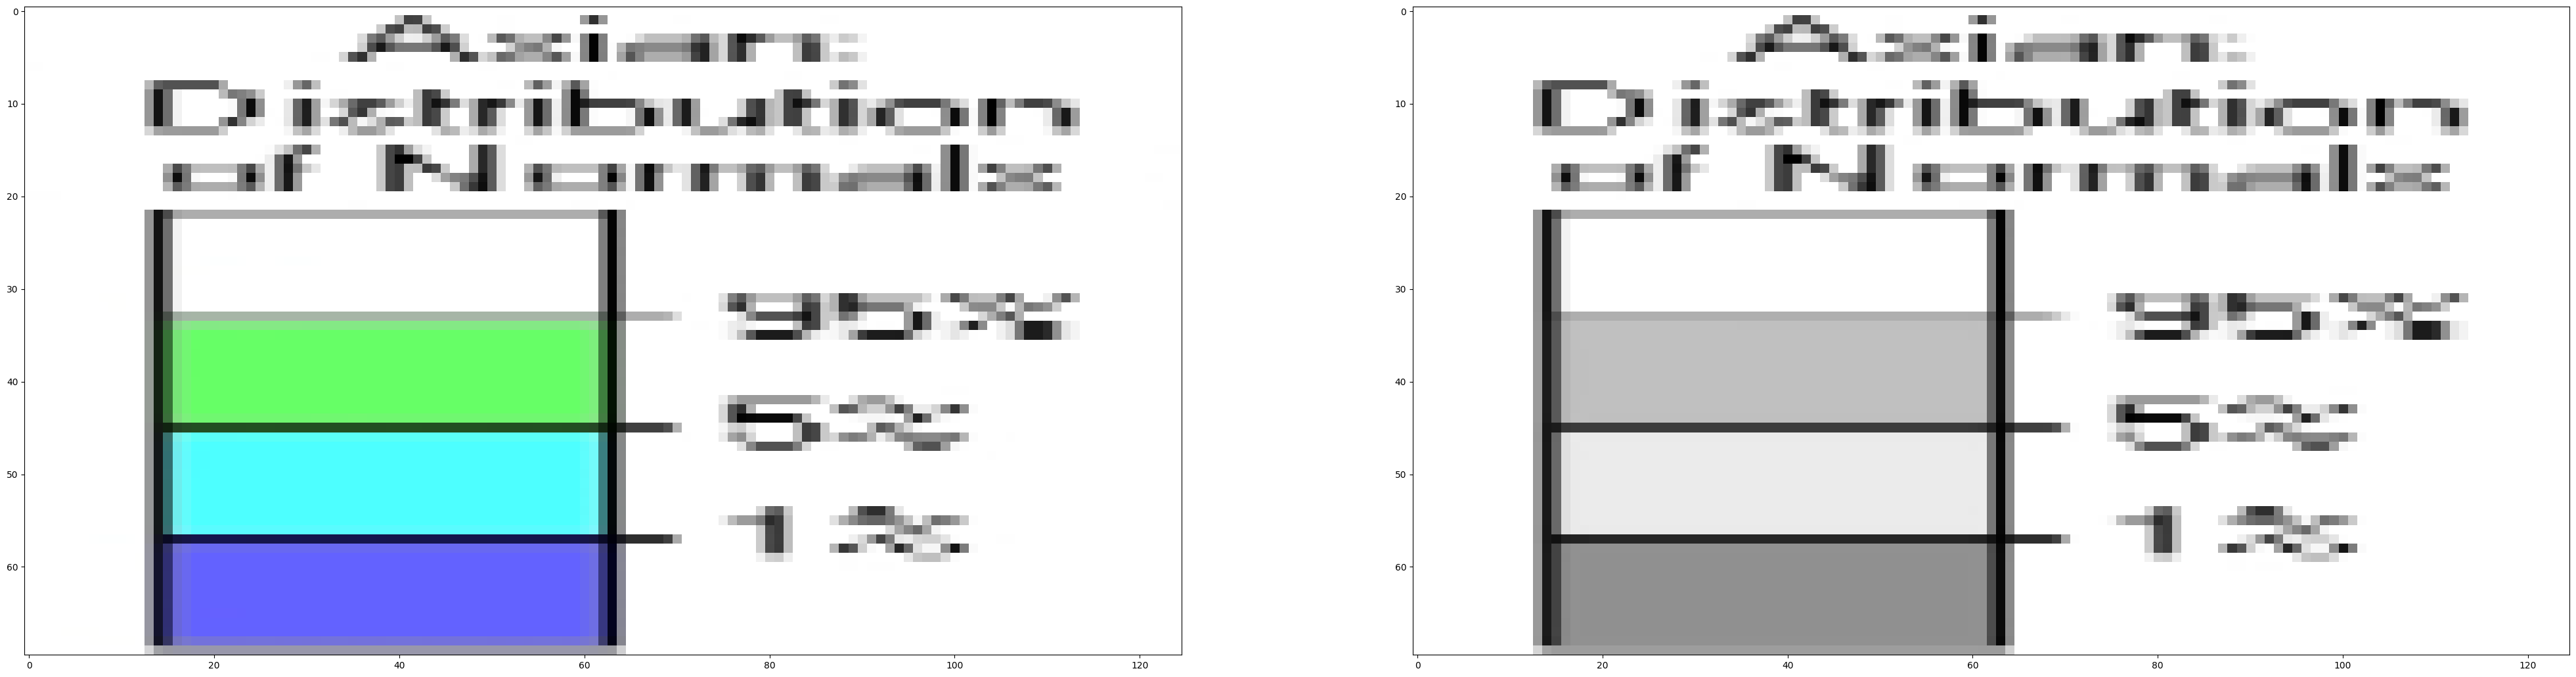

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(50, 50))
axs[0].imshow(img, cmap='gray')
axs[1].imshow(pre_img, cmap='gray')

In [22]:
reader = easyocr.Reader(['en'], gpu=True, )
results_normal = reader.readtext(img)
results_pre = reader.readtext(pre_img)

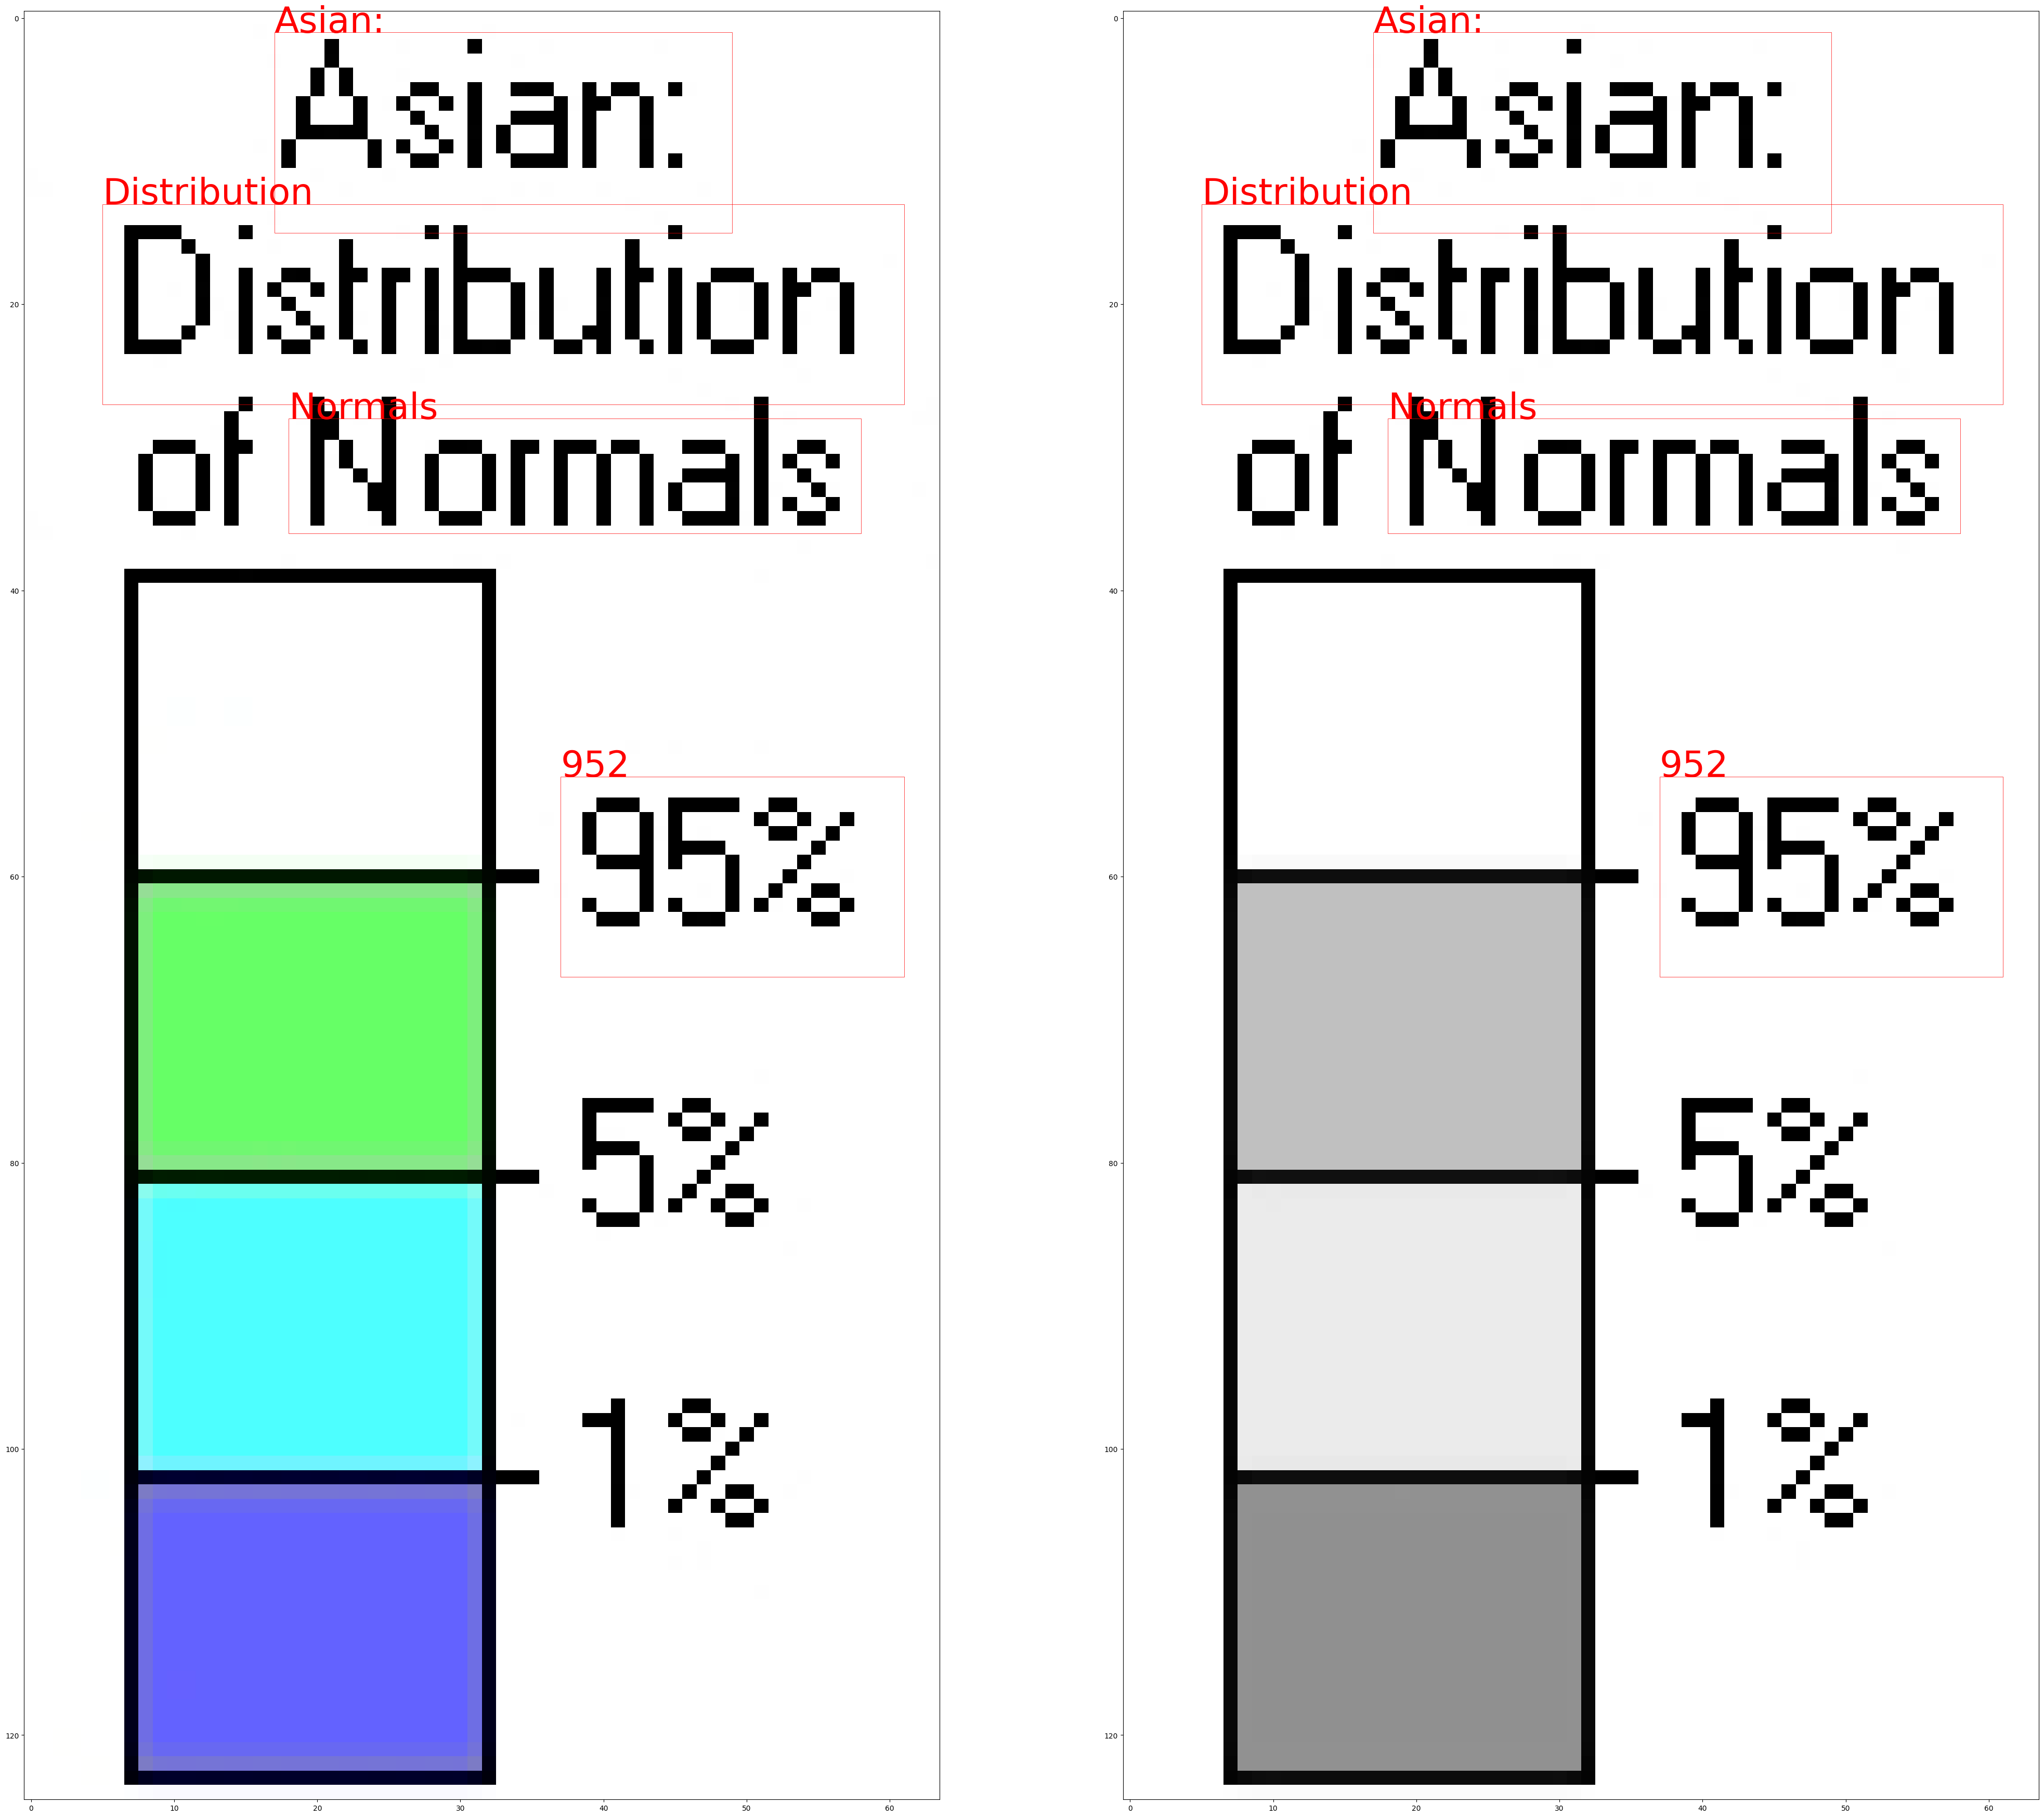

In [17]:
#compare results from normal and preprocessed image
fig, axs = plt.subplots(1, 2, figsize=(50, 50))
axs[0].imshow(img, cmap='gray')
for result in results_normal:
    bbox = result[0]
    text = result[1]
    patch = patches.Rectangle((bbox[0][0], bbox[0][1]), bbox[2][0]-bbox[-1][0], bbox[-1][1]-bbox[0][1], linewidth=0.5, edgecolor='r', facecolor='none')
    axs[0].add_patch(patch)
    axs[0].text(bbox[0][0], bbox[0][1], text, fontsize=50, color='r')

axs[1].imshow(pre_img, cmap='gray')
for result in results_pre:
    bbox = result[0]
    text = result[1]
    patch = patches.Rectangle((bbox[0][0], bbox[0][1]), bbox[2][0]-bbox[-1][0], bbox[-1][1]-bbox[0][1], linewidth=0.5, edgecolor='r', facecolor='none')
    axs[1].add_patch(patch)
    axs[1].text(bbox[0][0], bbox[0][1], text, fontsize=50, color='r')
plt.show()